<a href="https://colab.research.google.com/github/SproutCoder/q4.0/blob/main/farben_lernen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Farbklassifizierung mit Perzeptron in Python verstehen

**Beschreibung**:

Willkommen zu diesem interaktiven Notebook zur Verwendung von Perzeptronen, einer Art von einschichtigen neuronalen Netzwerken, um Farben linear zu trennen. In diesem Notizbuch konzentrieren wir uns darauf, zwischen zwei Grundfarben zu unterscheiden: Rot und Blau, basierend auf ihren RGB-Werten. Wir verwenden ein vereinfachtes Modell, das nur die roten und blauen Komponenten der Farben berücksichtigt, was es zu einem zweidimensionalen Problem macht. Dieser Ansatz bietet ein grundlegendes Verständnis dafür, wie Perzeptronen Daten linear klassifizieren können.

**Was wir abdecken**:

* Datenvorbereitung: Wir beginnen damit, einen Datensatz aus roten und blauen Farben in einem 2D-Raum zu erstellen und zu visualisieren.
* Perzeptron-Modell: Wir führen das Konzept eines Perzeptrons ein, implementieren es von Grund auf und trainieren es, um die roten und blauen Datenpunkte zu trennen.
* Entscheidungsgrenze: Wir visualisieren die Entscheidungsgrenze, die durch das Perzeptron erstellt wurde, um zu verstehen, wie es zwischen den beiden Farben unterscheidet.
* Animation: Wir erstellen eine Animation, um den schrittweisen Prozess des Perzeptrons beim Erlernen der Farbtrennung zu demonstrieren.
* Evaluation (tbd): Wir bewerten die Leistung des Perzeptrons, indem wir korrekte Klassifizierungen und Fehlklassifizierungen betrachten.

**Ausblick**:

In späteren Versionen dieses Notebooks planen wir:
* Die grüne Komponente einzubeziehen, wodurch unser 2D-Problem zu einem 3D-Problem wird und eine umfassendere Farbtrennung ermöglicht.
* Nicht-lineare Trenner zu erkunden, indem wir unser einfaches Perzeptron auf komplexere neuronale Netzwerkarchitekturen aufrüsten. Dies wird es uns ermöglichen, komplexere Muster und Beziehungen in den Daten anzugehen.


Dieses Notizbuch ist für Personen gedacht, die die Grundlagen neuronaler Netzwerke und ihre Anwendung in der Farbklassifikation verstehen möchten. Die aktuelle Version ist vor allem für interne Zwecke gedacht und zur Weiterentwicklung und Veranschaulichung von Lehrmaterial.

## 1. Vorbereitung und Visualisierung der Farbdaten

In diesem Abschnitt konzentrieren wir uns auf die Auswahl und Visualisierung von Farbdaten, die als Grundlage für das Training unseres Perzeptron-Modells dienen. Die Farbtöne, die wir verwenden, sind vordefinierte HTML- und CSS-Farbnamen, deren Werte die online gefunden werden können. Wir werden diese Farben in einen für das maschinelle Lernen geeignetes Format bringen, sie in Trainings- und Testdaten unterteilen und visualisieren, um ein intuitives Verständnis der Aufgabe zu gewinnen.

**Farbton-Auswahl:**
Für unsere Analyse haben wir vordefinierte Farbtöne aus HTML und CSS verwendet. Diese Farben sind allgemein anerkannte Standards im Webdesign und bieten eine breite Palette an nuancierten Farbtönen, die sich gut für unsere Zwecke eignen. Die spezifischen RGB-Werte für die roten und blauen Farbtöne, die wir untersuchen, können auf Seiten wie [RapidTables](https://www.rapidtables.com/web/color/red-color.html) gefunden werden. Diese Quelle bietet eine umfassende Liste von Farbcodes und ihren jeweiligen visuellen Darstellungen, was sie zu einem hilfreichem Werkzeug für unser Projekt macht.

Hier sind zum Beispiel die verwendeten RGB-Werte für Rot.

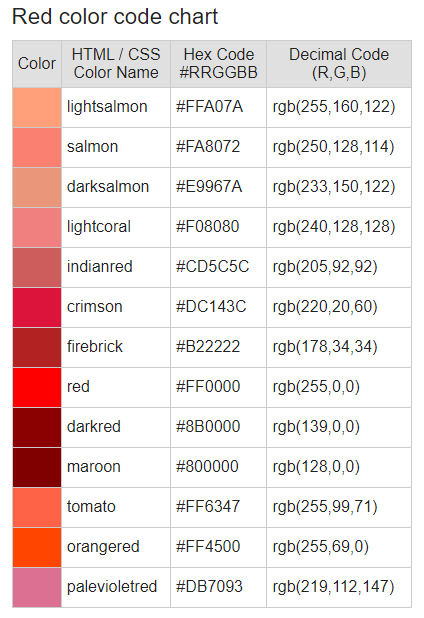

**Datenstrukturierung**:
Wir werden die RGB-Werte der ausgewählten roten und blauen Farbtöne in NumPy-Arrays umwandeln. Jeder Farbton wird durch ein Tupel (R, G, B) repräsentiert, wobei R, G und B die Intensitätswerte der roten, grünen und blauen Komponenten sind.

In [ ]:
import numpy as np

In [ ]:
# define Red color values
red_values = np.array([
    [255, 160, 122], [250, 128, 114], [233, 150, 122], [240, 128, 128],
    [205, 92, 92], [220, 20, 60], [178, 34, 34], [255, 0, 0],
    [139, 0, 0], [128, 0, 0], [255, 99, 71], [255, 69, 0], [219, 112, 147]
])

# Defining Green color values
green_values = np.array([
    [124, 252, 0], [127, 255, 0], [50, 205, 50], [0, 255, 0],
    [34, 139, 34], [0, 128, 0], [0, 100, 0], [173, 255, 47],
    [154, 205, 50], [0, 255, 127], [0, 250, 154], [144, 238, 144],
    [152, 251, 152], [143, 188, 143], [60, 179, 113], [32, 178, 170],
    [46, 139, 87], [128, 128, 0], [85, 107, 47], [107, 142, 35]
])

# define Blue color values
blue_values = np.array([
    [240, 248, 255], [230, 230, 250], [176, 224, 230], [173, 216, 230],
    [135, 206, 250], [135, 206, 235], [0, 191, 255], [176, 196, 222],
    [30, 144, 255], [100, 149, 237], [70, 130, 180], [95, 158, 160],
    [123, 104, 238], [106, 90, 205], [72, 61, 139], [65, 105, 225],
    [0, 0, 255], [0, 0, 205], [0, 0, 139], [0, 0, 128], [25, 25, 112],
    [138, 43, 226], [75, 0, 130]
])

#red_values, blue_values, green_values

Jetzt visualisieren wir die Daten in einem 3D-Graphen:

In [ ]:
import plotly.graph_objs as go

# Create traces for red and blue colors
trace_red = go.Scatter3d(
    x=red_values[:, 0], y=red_values[:, 1], z=red_values[:, 2],
    mode='markers',
    marker=dict(size=5, color='red', opacity=0.8),
    name='Red Colors'
)

trace_green = go.Scatter3d(
    x=green_values[:, 0], y=green_values[:, 1], z=green_values[:, 2],
    mode='markers',
    marker=dict(size=5, color='green', opacity=0.8),
    name='Green Colors'
)

trace_blue = go.Scatter3d(
    x=blue_values[:, 0], y=blue_values[:, 1], z=blue_values[:, 2],
    mode='markers',
    marker=dict(size=5, color='blue', opacity=0.8),
    name='Blue Colors'
)

# Define the layout of the plot
layout = go.Layout(
    margin=dict(l=0, r=0, b=0, t=0),
    scene=dict(
        xaxis=dict(title='Red Value'),
        yaxis=dict(title='Green Value'),
        zaxis=dict(title='Blue Value')
    ),
    title='Interactive 3D Scatter Plot of Red and Blue Colors'
)

# Create the figure and display it
fig = go.Figure(data=[trace_red, trace_green, trace_blue], layout=layout)
fig.show()

Als nächstes vereinfachen wir das Problem, in dem wir nur die blau und rot Werte betrachten. Dadurch vereinfacht sich das Problem auf nur 2 Dimensionen. Wir visualisieren anschließend diesen verinfachten Datensatz.

In [ ]:
# Simplify the red and blue values to only contain red and blue components
red_simple_values = np.array([[r, b] for r, g, b in red_values])
blue_simple_values = np.array([[r, b] for r, g, b in blue_values])

#red_simple_values, blue_simple_values

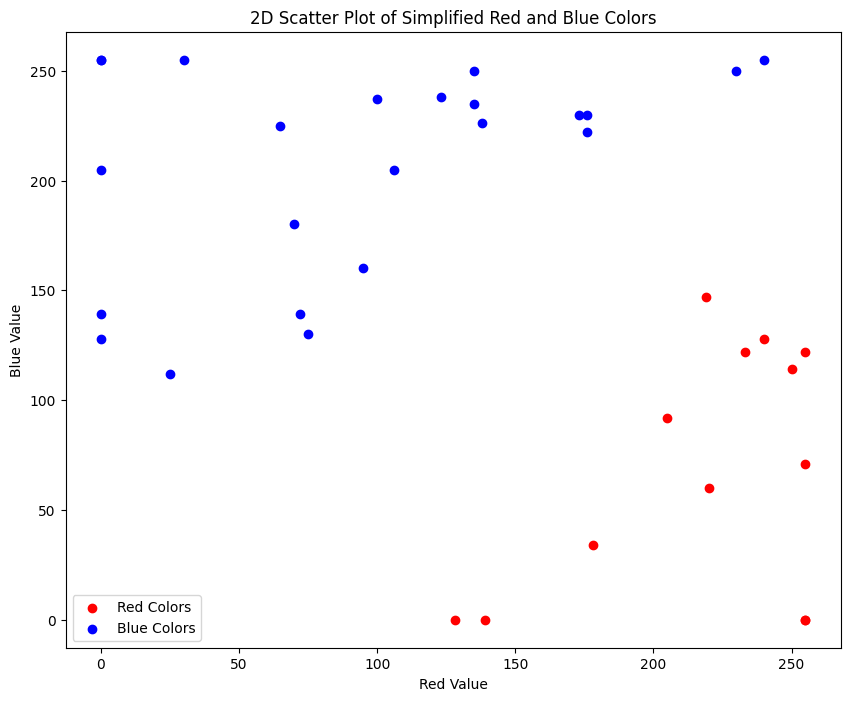

In [ ]:
from matplotlib import pyplot as plt
# Create a 2D plot using matplotlib
plt.figure(figsize=(10, 8))

# Plot red_simple_values
plt.scatter(red_simple_values[:, 0], red_simple_values[:, 1], c='red', label='Red Colors')

# Plot blue_simple_values
plt.scatter(blue_simple_values[:, 0], blue_simple_values[:, 1], c='blue', label='Blue Colors')

# Labeling
plt.xlabel('Red Value')
plt.ylabel('Blue Value')
plt.title('2D Scatter Plot of Simplified Red and Blue Colors')
plt.legend()

plt.show()

**Hinzufügen von Labels**:

Jedem Datenpunkt wird ein Label zugeordnet, das angibt, ob es sich um eine rote oder blaue Farbe handelt. Dies ist ein entscheidender Schritt, da diese Labels dem Perzeptron während des Trainings als Referenz dienen, um zu lernen, wie die Farben zu klassifizieren sind. Wir nutzen als Label die Zahlen 0 und 1, un dnicht 'blau' und 'rot', weil das Perzeptron nur mit Zahlen umgehen kann.

In [ ]:
# Add labels to the simplified red and blue values
# Label for red is 0 and for blue is 1
red_labeled_values = np.array([[r, b, 0] for r, b in red_simple_values])
blue_labeled_values = np.array([[r, b, 1] for r, b in blue_simple_values])

red_labeled_values, blue_labeled_values

(array([[255, 122,   0],
        [250, 114,   0],
        [233, 122,   0],
        [240, 128,   0],
        [205,  92,   0],
        [220,  60,   0],
        [178,  34,   0],
        [255,   0,   0],
        [139,   0,   0],
        [128,   0,   0],
        [255,  71,   0],
        [255,   0,   0],
        [219, 147,   0]]),
 array([[240, 255,   1],
        [230, 250,   1],
        [176, 230,   1],
        [173, 230,   1],
        [135, 250,   1],
        [135, 235,   1],
        [  0, 255,   1],
        [176, 222,   1],
        [ 30, 255,   1],
        [100, 237,   1],
        [ 70, 180,   1],
        [ 95, 160,   1],
        [123, 238,   1],
        [106, 205,   1],
        [ 72, 139,   1],
        [ 65, 225,   1],
        [  0, 255,   1],
        [  0, 205,   1],
        [  0, 139,   1],
        [  0, 128,   1],
        [ 25, 112,   1],
        [138, 226,   1],
        [ 75, 130,   1]]))

**Aufteilung in Trainings- und Testdaten:**

Um das Modell effektiv trainieren und bewerten zu können, teilen wir die Daten in einen Trainings- und einen Testsatz auf. Der Trainingsdatensatz wird verwendet, um das Perzeptron zu trainieren, während der Testsatz dazu dient, die Leistung des trainierten Modells unabhängig zu bewerten. Anschließend werden die aufgeteilten Daten visualisert.

In [ ]:
from sklearn.model_selection import train_test_split

# Merge the labeled red and blue values into one
all_data = np.vstack((red_labeled_values, blue_labeled_values))

# Split features and labels
X = all_data[:, :2]  # features (R, B)
y = all_data[:, 2]   # labels (0 or 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Now X_train and y_train can be used for training the model,
# and X_test and y_test for evaluating its performance.

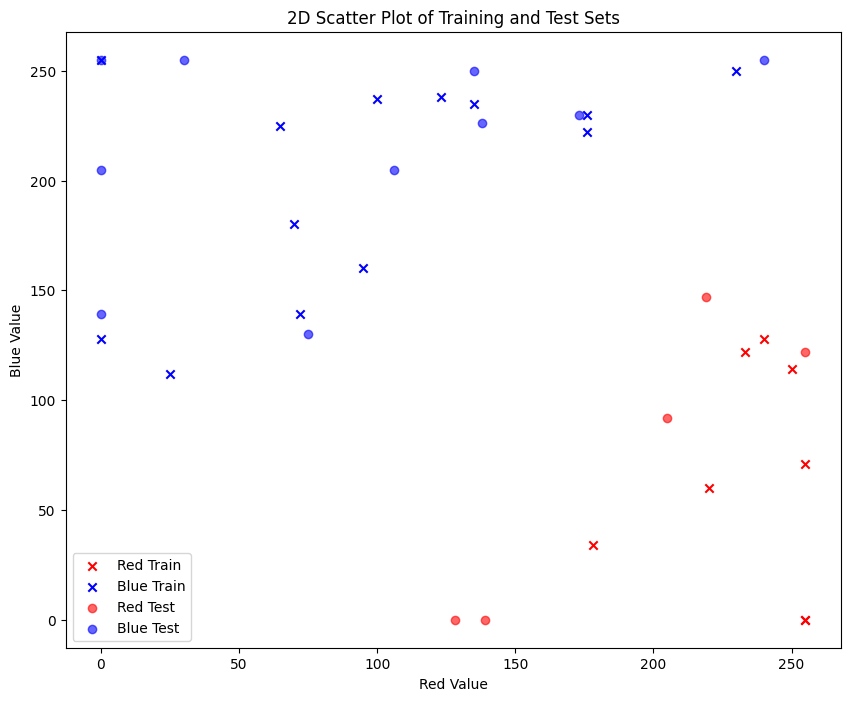

In [ ]:
# Create a 2D plot using matplotlib
plt.figure(figsize=(10, 8))

# Plot training data
plt.scatter(X_train[y_train==0][:, 0], X_train[y_train==0][:, 1], c='red', marker='x', label='Red Train')
plt.scatter(X_train[y_train==1][:, 0], X_train[y_train==1][:, 1], c='blue', marker='x', label='Blue Train')

# Plot test data
plt.scatter(X_test[y_test==0][:, 0], X_test[y_test==0][:, 1], c='red', marker='o', label='Red Test', alpha=0.6)
plt.scatter(X_test[y_test==1][:, 0], X_test[y_test==1][:, 1], c='blue', marker='o', label='Blue Test', alpha=0.6)

# Labeling
plt.xlabel('Red Value')
plt.ylabel('Blue Value')
plt.title('2D Scatter Plot of Training and Test Sets')
plt.legend()

plt.show()

## 2. Implementierung und Training des Perzeptrons

**Perzeptron-Modell definieren**:

Wir beginnen mit der Definition einer Perzeptron-Klasse in Python. Diese Klasse beinhaltet die Initialisierung der Gewichte und des Bias, die Definition der Aktivierungsfunktion und die Implementierung der Lernregel. Dies bildet das Grundgerüst unseres Klassifikators.

In [ ]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.1, n_iters=1000):
        self.lr = learning_rate  # Learning rate
        self.n_iters = n_iters  # Number of iterations over the training set
        self.activation_func = self._unit_step_func  # Activation function
        self.weights = None
        self.bias = None

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Ensure labels are only 0 or 1
        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):

                # Calculate the linear combination of weights and sample + bias
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_func(linear_output)


**Trainingsprozess:**

Nach der Definition des Modells initialisieren wir eine Instanz des Perzeptrons und trainieren sie mit unseren Trainingsdaten. Während des Trainingsprozesses passt das Perzeptron seine Gewichte kontinuierlich an, um die Unterscheidung zwischen den Farben zu optimieren. Dieser Prozess wird in mehreren Iterationen durchgeführt, bis das Modell konvergiert oder eine vorgegebene Anzahl von Durchläufen erreicht.

In [ ]:
# Now, create a perceptron instance and train it
perceptron = Perceptron(learning_rate=0.01, n_iters=1000)
perceptron.fit(X_train, y_train)

**Trainingsergebnisse evaluieren:**

Wir bewerten die Leistung unseres trainierten Perzeptrons, indem wir es auf den Testdatensatz anwenden. [Dabei untersuchen wir, wie gut das Modell die Farben klassifizieren kann, und identifizieren Fälle, in denen es zu Fehlklassifikationen kommt. Diese Analyse hilft uns, die Wirksamkeit des Perzeptrons zu verstehen und mögliche Bereiche für Verbesserungen zu identifizieren.] Außerdem visualisieren wir die Entscheidungsgrenze des Perzeptrons.

In [ ]:
# Make predictions on the test data
predictions = perceptron.predict(X_test)
#predictions = np.array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0]) # wrong alternative predictions to test how the plot would look like with missclassificaitons

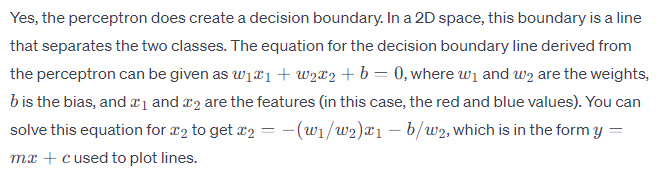

In [ ]:
# Perceptron values for the decision boundary
#w1, w2 = perceptron.weights  # w1 and w2 are the weights for the red and blue values, respectively
#b = perceptron.bias  # b is the bias
#print(w1, w2, b)

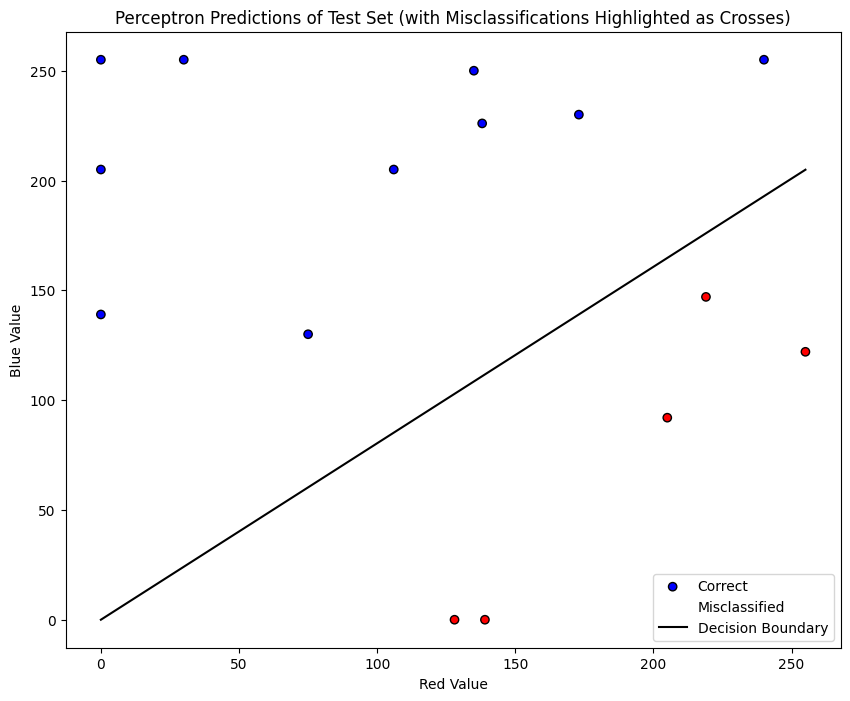

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 2D plot using matplotlib
plt.figure(figsize=(10, 8))

# Create a color map based on the labels
color_map = np.array(['red', 'blue'])

# Correct predictions
correct_preds = (predictions == y_test)
plt.scatter(X_test[correct_preds][:, 0], X_test[correct_preds][:, 1],
            c=color_map[y_test[correct_preds].astype(int)],
            marker='o', label='Correct', edgecolors='k')

# Misclassifications
incorrect_preds = (predictions != y_test)
plt.scatter(X_test[incorrect_preds][:, 0], X_test[incorrect_preds][:, 1],
            c=color_map[y_test[incorrect_preds].astype(int)],
            marker='x', label='Misclassified', s=100)

# Perceptron values for the decision boundary
w1, w2 = perceptron.weights  # w1 and w2 are the weights for the red and blue values, respectively
b = perceptron.bias  # b is the bias

# Calculate the x values of the decision boundary
x_values = np.array([min(X_test[:, 0]), max(X_test[:, 0])])

# Calculate the y values of the decision boundary
y_values = -(w1/w2)*x_values - b/w2

# Plot the decision boundary
plt.plot(x_values, y_values, label='Decision Boundary', color='black')

# Labeling
plt.xlabel('Red Value')
plt.ylabel('Blue Value')
plt.title('Perceptron Predictions of Test Set (with Misclassifications Highlighted as Crosses)')
plt.legend()

plt.show()


In [ ]:
# print(correct_preds) #for debbugging

### Animation, die den bisherigen Prozess zusammenfasst.

<ipython-input-52-b30e790a9976>:51: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored

<ipython-input-52-b30e790a9976>:69: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



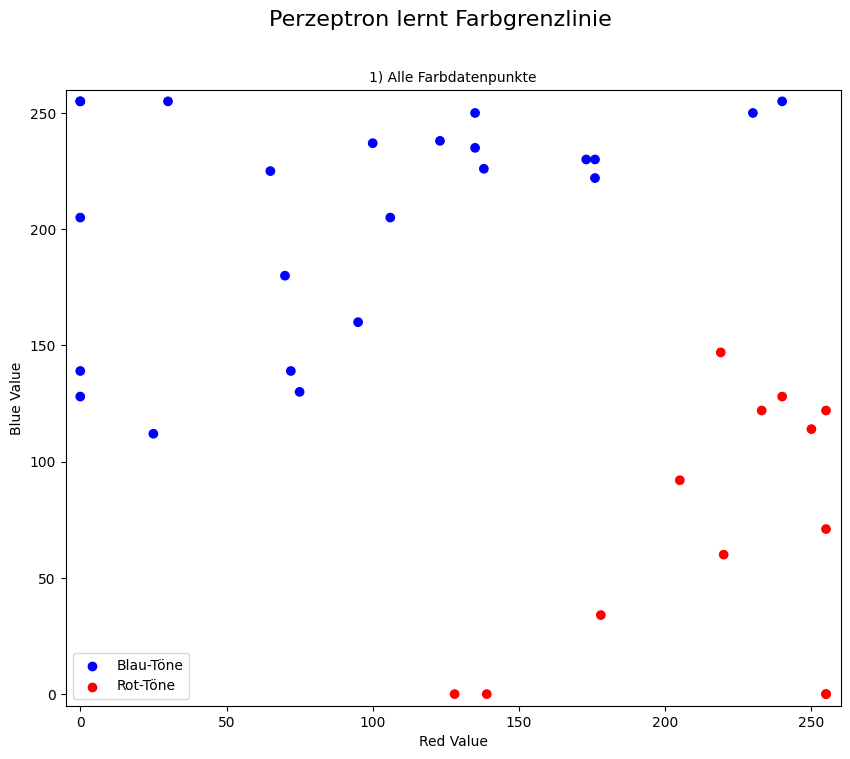

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(10, 8))

# Subtitles and labels for each frame
subtitles = [
    "1) Alle Farbdatenpunkte",
    "2) Aufteilung der Datenpunkte in Test und Trainingsdaten",
    "3) Trainingsdaten, aus denen das Perzeptron lernt",
    "4) Perzeptron lernt Grenzlinie aus Trainingsdaten",
    "5) Perzeptrons Grenzlinie klassifiziert ungesehene Testdaten"
]

legend_labels = [
    [('Blau-Töne', 'blue', 'o'), ('Rot-Töne', 'red', 'o')],
    [('rote Trainingsdaten', 'red', 'o'), ('rote Testdaten', 'red', 's'), ('blaue Trainingsdaten', 'blue', 'o'), ('blaue Testdaten', 'blue', 's')],
    [('Trainingsdaten', 'black', 'o')],
    [('Trainingsdaten', 'black', 'o'), ('gelernte Entscheidungsgrenze', 'black', '-')],
    [('korrekt klassifiziert', 'black', 's'), ('falsch klassifiziert', 'black', 'x')]
]

# Function to update the frame
def update(frame):
    ax.clear()

    # Set the title and subtitle for each frame
    plt.suptitle('Perzeptron lernt Farbgrenzlinie', fontsize=16)
    plt.title(subtitles[frame], fontsize=10)

    # Set labels
    plt.xlabel('Red Value')
    plt.ylabel('Blue Value')

    # Define the scatter plot and line style for the legend
    for label, color, marker in legend_labels[frame]:
        if marker == '-':
            ax.plot([], [], color=color, label=label, linestyle=marker)
        else:
            ax.scatter([], [], c=color, marker=marker, label=label)

    # Plot data points according to the frame
    if frame == 0:
        # Plot all data points
        colors = ['red' if label == 0 else 'blue' for label in y]
        ax.scatter(X[:, 0], X[:, 1], c=colors, marker='o', cmap='bwr')
    elif frame == 1:
        # Differentiate between test and training data with different markers
        ax.scatter(X_train[y_train==0][:, 0], X_train[y_train==0][:, 1], c='red', marker='o')
        ax.scatter(X_train[y_train==1][:, 0], X_train[y_train==1][:, 1], c='blue', marker='o')
        ax.scatter(X_test[y_test==0][:, 0], X_test[y_test==0][:, 1], c='red', marker='s')
        ax.scatter(X_test[y_test==1][:, 0], X_test[y_test==1][:, 1], c='blue', marker='s')
    elif frame == 2:
        # Only training data color based on label
        colors = ['red' if label == 0 else 'blue' for label in y_train]
        ax.scatter(X_train[:, 0], X_train[:, 1], c=colors, marker='o')
    elif frame == 3:
        # Add decision boundary to Training data
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', cmap='bwr')
        x_values = np.array([min(X[:, 0]), max(X[:, 0])])
        y_values = -(perceptron.weights[0]/perceptron.weights[1])*x_values - perceptron.bias/perceptron.weights[1]
        ax.plot(x_values, y_values)
        colors = ['red' if label == 0 else 'blue' for label in y_train]
        ax.scatter(X_train[:, 0], X_train[:, 1], c=colors, marker='o', cmap='bwr')
    if frame == 4:
        # Show perceptron predictions and decision boundary
        x_values = np.array([min(X[:, 0]), max(X[:, 0])])
        y_values = -(perceptron.weights[0]/perceptron.weights[1])*x_values - perceptron.bias/perceptron.weights[1]
        ax.plot(x_values, y_values)

        # Determine correct and incorrect predictions
        correct_preds = (predictions == y_test)
        incorrect_preds = (predictions != y_test)

        # Define colors for correct predictions
        correct_colors = ['red' if label == 0 else 'blue' for label in y_test[correct_preds]]
        # Define colors for incorrect predictions
        incorrect_colors = ['red' if label == 0 else 'blue' for label in y_test[incorrect_preds]]

        # Scatter plot for correct predictions
        ax.scatter(X_test[correct_preds][:, 0], X_test[correct_preds][:, 1], c=correct_colors, marker='s')
        # Scatter plot for incorrect predictions with different size
        ax.scatter(X_test[incorrect_preds][:, 0], X_test[incorrect_preds][:, 1], c=incorrect_colors, marker='x', s=100)

    # Legend positioning in the bottom left corner
    ax.legend(loc='lower left')

 # Set the limits of the axes
    ax.set_xlim([-5, 260])
    ax.set_ylim([-5, 260])

ani = FuncAnimation(fig, update, frames=[0, 1, 2, 3,4], repeat=True, interval=3400, repeat_delay=3400)

# Display the animation in a Jupyter notebook
HTML(ani.to_html5_video())

# Optionally, you can save the animation to a file.
# ani.save('perceptron_animation.mp4')
